In [9]:
import torch
import gpytorch
from matplotlib import pyplot as plt
from gpytorch.likelihoods import GaussianLikelihood

import numpy as np

%matplotlib inline
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define the 2D objective Function:

In [10]:
def objective(x,noise=0.1):
    # Transform x1 and x2:
    x1 = x[:,0]
    x2 = x[:,1]
    x1 = (x1) * 4. - 2.
    x2 = (x2) * 4. - 2.
    
    # Compute the function for both x1 and x2
    # term1 = 2 * torch.cos(x1)
    # term2 = 2 * torch.cos(x2)
     
    # Compute the function for both x1 and x2
    term1 = 2 * torch.sin(5 * x1) * (1 - torch.tanh(x1 ** 2))
    term2 = 2 * torch.sin(5 * x2) * (1 - torch.tanh(x2 ** 2))
    
    # Combine the terms (e.g., add them together)
    result = term1 + term2
    
    # Add noise
    # result += torch.rand(1) * noise + 2.
    
    return result

Generate training and test data:

X_train: torch.Size([1000, 2])
Y_train: tensor([-2.8573e-01, -2.2489e-02, -3.0072e-03,  2.2717e-05,  2.0393e+00,
        -3.4517e-02, -3.3715e-01, -2.3253e-02,  5.4969e-01, -1.6118e+00,
        -1.8727e-06, -1.7543e-01, -3.1702e-01, -4.8398e-04, -7.7693e-01,
         0.0000e+00,  1.4582e-01, -6.5392e-04,  0.0000e+00, -1.5826e+00,
        -1.4395e-03, -6.5328e-01,  3.1804e-02,  2.5548e-01, -7.7545e-01,
        -4.1013e-02, -6.6314e-01,  6.8086e-01,  7.2370e-04,  0.0000e+00,
         4.2845e-01,  2.5479e-01,  2.4137e-04, -5.0338e-02, -2.2795e-07,
         0.0000e+00,  7.9206e-03,  0.0000e+00,  5.9187e-04,  3.7315e-04,
         6.7575e-01,  1.6146e-02,  4.3333e-04,  1.2197e+00,  3.6557e-01,
         0.0000e+00,  2.6704e-03, -0.0000e+00, -2.3751e-02,  1.0458e-05,
         2.9486e-04,  5.6919e-01,  0.0000e+00, -1.6873e-06,  1.8135e+00,
        -3.9014e-02,  0.0000e+00,  6.7512e-01,  0.0000e+00,  0.0000e+00,
        -4.2386e-02,  0.0000e+00,  0.0000e+00, -8.0943e-08,  3.0203e-01,
         3.

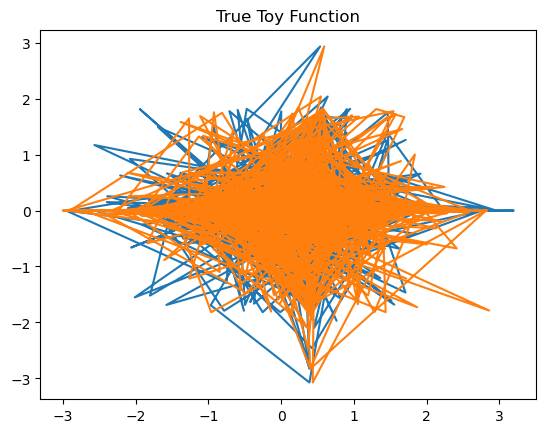

In [11]:
x_train = torch.randn(1000,2) #gerne auch 10.000 Punkte nehmen
y_train = objective(x_train)

print("X_train:", x_train.shape)
print("Y_train:", y_train)

plt.plot(x_train, y_train)
plt.title('True Toy Function')

x_valid = torch.randn(10,2)
y_valid = objective(x_valid)

In [12]:
def objective_test(x1,x2,noise=0.1):
    
    x1 = (x1) * 4. - 2.
    x2 = (x2) * 4. - 2.
    
    # # Compute the function for both x1 and x2
    # term1 = 2 * torch.cos(x1)
    # term2 = 2 * torch.cos(x2)
     
    # Compute the function for both x1 and x2
    term1 = 2 * torch.sin(5 * x1) * (1 - torch.tanh(x1 ** 2))
    term2 = 2 * torch.sin(5 * x2) * (1 - torch.tanh(x2 ** 2))
    
    # Combine the terms (e.g., add them together)
    result = term1 + term2
    
    # Add noise
    # result += torch.rand(1) * noise + 2.
    
    return result

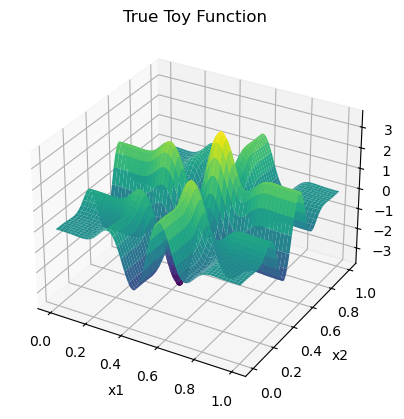

In [13]:
x1 = torch.linspace(0,1,1000)
x2 = torch.linspace(0,1,1000)

x1_grid, x2_grid = torch.meshgrid(x1, x2)

y = objective_test(x1_grid,x2_grid)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid.numpy(), x2_grid.numpy(), y.numpy(), cmap='viridis')

# Set plot labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('True Toy Function')

# Show the plot
plt.show()

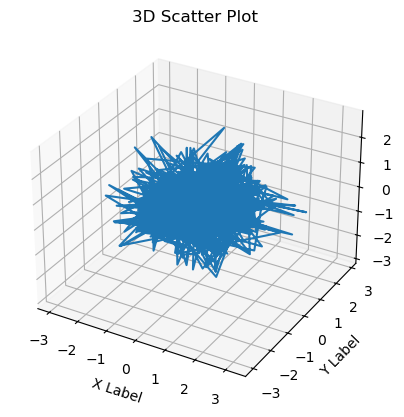

In [14]:
# Sample data
x = x_train[:,0]
y = x_train[:,1]
z = y_train

# Create a new figure and 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.plot(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Display the plot
plt.show()

In [ ]:
from multitaskGP2D import MultitaskGP2D

likelihood = GaussianLikelihood()
multitask_gp = MultitaskGP2D(x_train, y_train, x_valid, y_valid, likelihood, 2)

best_multitask_gp, losses, losses_valid = multitask_gp.do_train_loop(iters=2000)

Plot losses

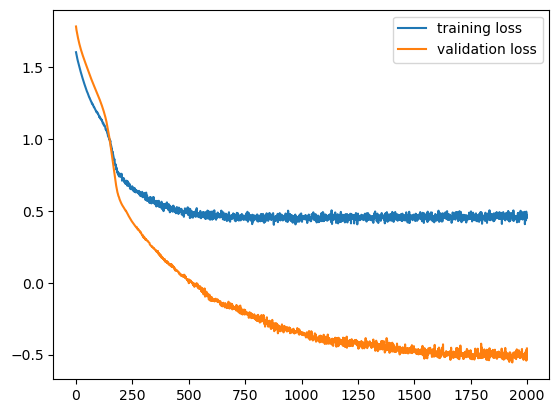

In [16]:
plt.plot(losses, label='training loss')
plt.plot(losses_valid, label='validation loss')
plt.legend()

Best parameters:

In [17]:
best_multitask_gp.state_dict()

OrderedDict([('likelihood.noise_covar.raw_noise', tensor([-10.3573])),
             ('likelihood.noise_covar.raw_noise_constraint.lower_bound',
              tensor(1.0000e-04)),
             ('likelihood.noise_covar.raw_noise_constraint.upper_bound',
              tensor(inf)),
             ('mean_module.weights',
              tensor([[-0.0108],
                      [-0.0168]])),
             ('mean_module.bias', tensor([-0.0145])),
             ('covar_module.raw_lengthscale', tensor([[-2.2365]])),
             ('covar_module.raw_lengthscale_constraint.lower_bound',
              tensor(0.)),
             ('covar_module.raw_lengthscale_constraint.upper_bound',
              tensor(inf)),
             ('task_covar_module.covar_factor', tensor([[0.1136]])),
             ('task_covar_module.raw_var', tensor([0.4353])),
             ('task_covar_module.IndexKernelPrior.a', tensor([0.])),
             ('task_covar_module.IndexKernelPrior.b', tensor([1.])),
             ('task_covar_modu

In [18]:
params = best_multitask_gp.named_parameters()

for name, param in params:
    print(f"Name: {name}, Value: {param.data}")

Name: likelihood.noise_covar.raw_noise, Value: tensor([-10.3573])
Name: mean_module.weights, Value: tensor([[-0.0108],
        [-0.0168]])
Name: mean_module.bias, Value: tensor([-0.0145])
Name: covar_module.raw_lengthscale, Value: tensor([[-2.2365]])
Name: task_covar_module.covar_factor, Value: tensor([[0.1136]])
Name: task_covar_module.raw_var, Value: tensor([0.4353])


Evaluate on test data & get entropy

In [19]:
# Define the range and number of points along each dimension
x_range = torch.linspace(0, 1, 100)  # Evenly spaced values between 0 and 1 (inclusive), 10 points
y_range = torch.linspace(0, 1, 100)  # Evenly spaced values between 0 and 1 (inclusive), 10 points

# Create 2D grid of x and y values
x, y = torch.meshgrid(x_range, y_range)

# Stack x and y tensors along a new dimension to create the 2D tensor
x_test = torch.stack((x.flatten(), y.flatten()), dim=1)

y_test = objective(x_test)

print(x_test.shape, y_test.shape)

print(x_train.shape, y_train.shape)

torch.Size([10000, 2]) torch.Size([10000])
torch.Size([1000, 2]) torch.Size([1000])


In [20]:
from entropy import entropy_local 

def evaluate(multitask_gp, likelihood, x_test):
    """Evaluate GP on test sample and calculate corresponding entropies."""

    multitask_gp.eval()
    likelihood.eval()

    with torch.no_grad():
        # Get prediction:
        observed_pred = likelihood(multitask_gp(x_test))

        # Get upper and lower confidence bounds
        mean = observed_pred.mean.detach().reshape(-1, 1)
        device = "cuda" if torch.cuda.is_available() else "cpu"
        dtype = torch.float32
        var = observed_pred.variance.detach().reshape(-1, 1)
        thr = torch.Tensor([0.]) # Threshold in CDF calculation. Needs to be more sophisticated if params are scaled.

        entropy = entropy_local(mean, var, thr, device, dtype)
        
    return observed_pred, entropy

observed_pred, entropy = evaluate(multitask_gp, likelihood, x_test)

weights: torch.Size([2, 1])
X: torch.Size([11000, 2])
X: tensor([[-0.7548,  0.7686],
        [-0.3144,  0.0985],
        [ 0.1849, -1.3270],
        ...,
        [ 1.0000,  0.9798],
        [ 1.0000,  0.9899],
        [ 1.0000,  1.0000]])
weights: Parameter containing:
tensor([[-0.0108],
        [-0.0168]], requires_grad=True)


c:\Users\HP\anaconda3\envs\ALenv\Lib\site-packages\gpytorch\distributions\multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  warnings.warn(


Plot the True Function next to the GP:

In [21]:
mean = observed_pred.mean.numpy()

print(x_test.shape)
print(x_train.shape)
print(torch.tensor(mean).shape)
print(y_train.shape)
print(torch.tensor(mean))
print(y_train)

torch.Size([10000, 2])
torch.Size([1000, 2])
torch.Size([10000])
torch.Size([1000])
tensor([-0.0210, -0.0229, -0.0240,  ..., -0.0125, -0.0130, -0.0111])
tensor([-2.8573e-01, -2.2489e-02, -3.0072e-03,  2.2717e-05,  2.0393e+00,
        -3.4517e-02, -3.3715e-01, -2.3253e-02,  5.4969e-01, -1.6118e+00,
        -1.8727e-06, -1.7543e-01, -3.1702e-01, -4.8398e-04, -7.7693e-01,
         0.0000e+00,  1.4582e-01, -6.5392e-04,  0.0000e+00, -1.5826e+00,
        -1.4395e-03, -6.5328e-01,  3.1804e-02,  2.5548e-01, -7.7545e-01,
        -4.1013e-02, -6.6314e-01,  6.8086e-01,  7.2370e-04,  0.0000e+00,
         4.2845e-01,  2.5479e-01,  2.4137e-04, -5.0338e-02, -2.2795e-07,
         0.0000e+00,  7.9206e-03,  0.0000e+00,  5.9187e-04,  3.7315e-04,
         6.7575e-01,  1.6146e-02,  4.3333e-04,  1.2197e+00,  3.6557e-01,
         0.0000e+00,  2.6704e-03, -0.0000e+00, -2.3751e-02,  1.0458e-05,
         2.9486e-04,  5.6919e-01,  0.0000e+00, -1.6873e-06,  1.8135e+00,
        -3.9014e-02,  0.0000e+00,  6.7512e-0

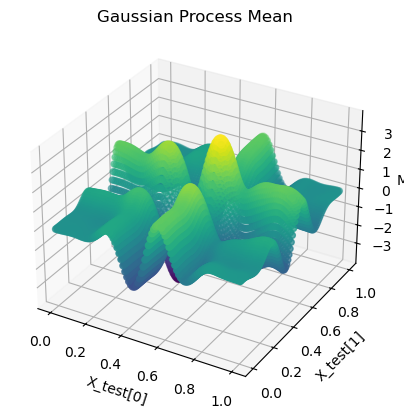

In [27]:
# Sample data
x = x_test[:,0]
y = x_test[:,1]
z = torch.tensor(mean)

# Create a new figure and 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
sc = ax.scatter(x, y, z, c=z, cmap='viridis')
#ax.plot(x, y, z)
# ax.plot_surface(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_test[0]')
ax.set_ylabel('X_test[1]')
ax.set_zlabel('Mean')
ax.set_title('Gaussian Process Mean')

# Display the plot
plt.show()

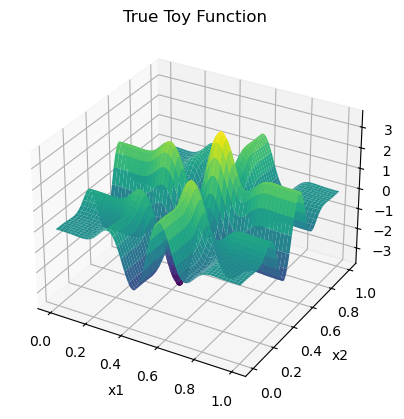

In [ ]:
x1 = torch.linspace(0,1,1000)
x2 = torch.linspace(0,1,1000)

x1_grid, x2_grid = torch.meshgrid(x1, x2)

y = objective_test(x1_grid,x2_grid)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid.numpy(), x2_grid.numpy(), y.numpy(), cmap='viridis')

# Set plot labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('True Toy Function')

# Show the plot
plt.show()

In [29]:
mean = observed_pred.mean.numpy()
lower, upper = observed_pred.confidence_region()

# Find the top 10 highest entropy values and their indices
topk_values, topk_indices = torch.topk(entropy, 10)
tenX = x_test[topk_indices]

maxE = torch.max(entropy)
maxIndex = torch.argmax(entropy)
maxX = x_test[maxIndex]

c:\Users\HP\anaconda3\envs\ALenv\Lib\site-packages\gpytorch\distributions\multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  warnings.warn(


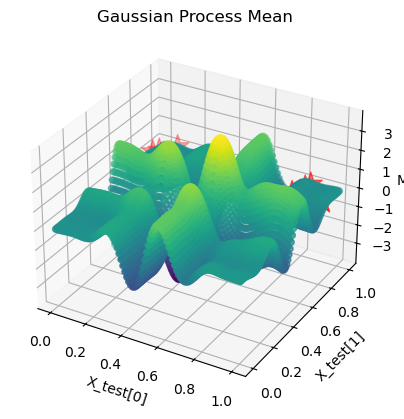

In [36]:
# Sample data
x = x_test[:,0]
y = x_test[:,1]
z = mean

# Extract the top 10 points with the highest entropy
top_10_points = x_test[topk_indices]
top_10_means = torch.tensor(mean[topk_indices])

# Create a new figure and 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(x, y, z, c=z, cmap='viridis' )

# Plot the top 10 points with highest entropy as stars
ax.scatter(top_10_points[:, 0].numpy(), top_10_points[:, 1].numpy(), top_10_means.numpy(), 
           color='r', marker='*', s=300, label='Top 10 High Entropy Points')

# Set labels and title
ax.set_xlabel('X_test[0]')
ax.set_ylabel('X_test[1]')
ax.set_zlabel('Mean')
ax.set_title('Gaussian Process Mean')

# Display the plot
plt.show()

In [ ]:
def plotGP(new_x = None):
    """Plot GP inclusive entropy"""

    mean = observed_pred.mean.numpy()
    lower, upper = observed_pred.confidence_region()

    # # Initialize plot
    # _, ax = plt.subplots(1, 1, figsize=(10, 6))

    # # Plot training data as black stars
    # ax.plot(x_train.numpy(), y_train.numpy(), 'k*', label='Training Data')
    # # Plot predictive means as blue line
    # ax.plot(x_test.numpy(), mean, 'b', label='Learnt Function')
    # # Shade between the lower and upper confidence bounds
    # ax.fill_between(x_test.numpy(), lower.numpy(), upper.numpy(), alpha=0.5, label='Confidence')
    # # ax.set_ylim([-3, 3])
    # ax.plot(x_test, y_test, 'r', label='Truth')

    # # Add new points to be evaluated:
    # if new_x is not None:
    #     dolabel = True
    #     for xval in new_x:
    #         ax.axvline(x=xval, color='r', linestyle='--', label='new points') if dolabel else ax.axvline(x=xval, color='r', linestyle='--')
    #         dolabel = False

    # ax2 = ax.twinx()
    # ax2.set_ylabel("entropy")
    # ax2.plot(x_test, entropy, 'g', label='Entropy')

    maxE = torch.max(entropy)
    maxIndex = torch.argmax(entropy)
    maxX = x_test[maxIndex]
    # ax2.plot(maxX, maxE, 'go', label='Max. E')

    # add common legend:
    # lines, labels = ax.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # ax2.legend(lines + lines2, labels + labels2)

plotGP()

Find new target for training based on entropy (skipping batch acquisiton for now)

In [ ]:
maxE = torch.max(entropy)
maxIndex = torch.argmax(entropy)
maxX = x_test[maxIndex]
print(torch.tensor([maxX]))

print(f"Maximum entropy E={torch.max(entropy)} at x={maxX}")

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
print(x_train.shape)
print(maxX.shape)
x_train = torch.cat((x_train, maxX), dim=0)
x_train = torch.cat((x_train, torch.tensor([maxX])), dim=0)
y_train = torch.cat((y_train, objective(torch.tensor([maxX]))), dim=0) # Here i could use the mean instead of the evaluated function

x_train, y_train

torch.Size([10, 2])
torch.Size([2])


RuntimeError: Tensors must have same number of dimensions: got 2 and 1

Re-train with added sample:

In [ ]:
multitask_gp = MultitaskGP(x_train, y_train, x_valid, y_valid, likelihood)
best_multitask_gp, losses, losses_valid = multitask_gp.do_train_loop(iters=2000)

Iter 1 / 2000 - Loss (Train): 1.378 - Loss (Val): 1.318
Iter 101 / 2000 - Loss (Train): 0.970 - Loss (Val): -0.370
Iter 201 / 2000 - Loss (Train): 0.164 - Loss (Val): -2.402
Iter 301 / 2000 - Loss (Train): 0.159 - Loss (Val): -2.391
Iter 401 / 2000 - Loss (Train): 0.157 - Loss (Val): -2.388
Iter 501 / 2000 - Loss (Train): 0.156 - Loss (Val): -2.390
Iter 601 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.387
Iter 701 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.390
Iter 801 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.391
Iter 901 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.392
Iter 1001 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.390
Iter 1101 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.391
Iter 1201 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.390
Iter 1301 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.389
Iter 1401 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.392
Iter 1501 / 2000 - Loss (Train): 0.155 - Loss (Val): -2.393
Iter 1601 / 2000 - Loss (Train): 0.155 - Loss (Val): 

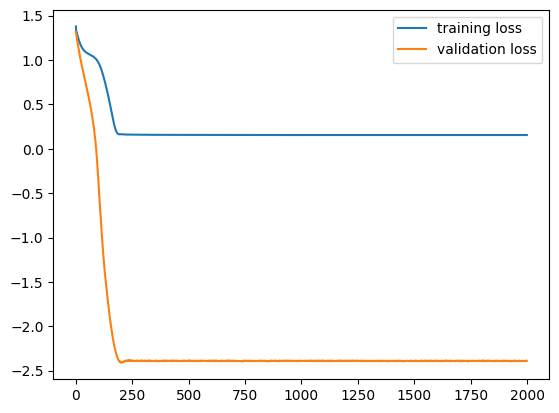

In [ ]:
plt.plot(losses, label='training loss')
plt.plot(losses_valid, label='validation loss')
plt.legend()

Evaluate again & plot the updated GP:

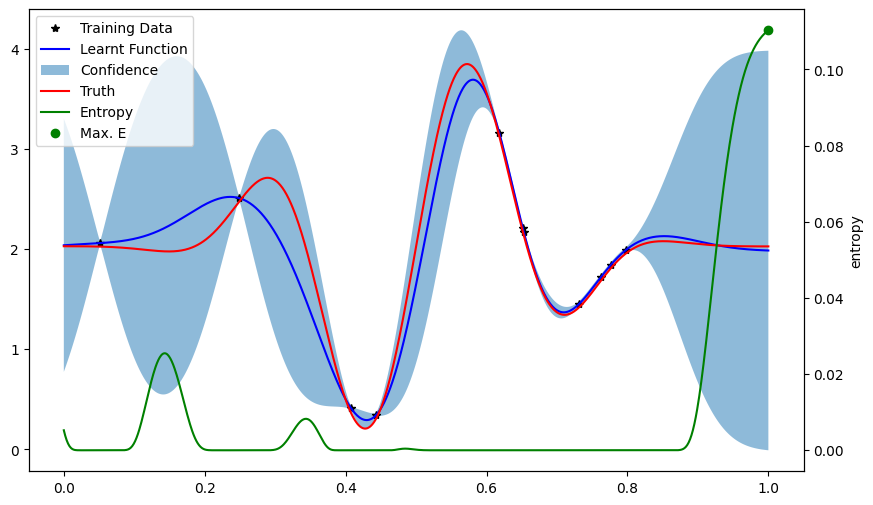

In [ ]:
observed_pred, entropy = evaluate(multitask_gp, likelihood, x_test)
plotGP()

Closing the loop with batch acquisition:

In [ ]:
def best_not_yet_chosen(score, previous_indices):

  candidates = torch.sort(score, descending = True)[1]

  for next_index in candidates:
    if int(next_index) not in previous_indices:
      return next_index

def iterative_batch_selector(score_function, 
                             choice_function = best_not_yet_chosen,
                             gp_mean = None, 
                             gp_covar= None, 
                             N = None):

  #make it a decorator
  if gp_mean is None:
    def greedy_batch_sel(gp_mean, gp_covar, N):
      return iterative_batch_selector(score_function, choice_function, gp_mean, gp_covar, N)
    return greedy_batch_sel
  


  #actual_function starts here

  #First point greedy
  score = score_function(gp_mean[:,None], torch.diag(gp_covar)[:,None,None])
  first_index = torch.argmax(score)
  indices = [int(first_index)]

  #Iterate for all points
  num_pts = len(gp_mean)

  for i in range(N-1):

    #Create the batched cov matrices
    center_cov = torch.stack([gp_covar[indices,][:,indices]]*num_pts)
    side_cov = gp_covar[:,None,indices]
    bottom_cov =  gp_covar[:,indices, None]
    end_cov = torch.diag(gp_covar)[:,None,None]

    cov_batch = torch.cat([
                  torch.cat([center_cov, side_cov],axis = 1),
                  torch.cat([bottom_cov, end_cov ],axis = 1),
                  ], axis = 2)
    
    #Create the batched mean vectors
    center_mean = torch.stack([gp_mean[indices,]]*num_pts)
    new_mean = gp_mean[:,None]


    mean_batch = torch.cat([center_mean,new_mean],axis=1)

    score = score_function(mean_batch,cov_batch)

    next_index = choice_function(score, indices)

    indices.append(int(next_index))

  return indices

In [ ]:
def approximate_batch_entropy(mean, cov):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  mean = mean
  n = mean.shape[-1]
  d = torch.diag_embed(1./mean).to(device) #like torch.diag but batches well
  x = d@cov@d.to(device)
  I = torch.eye(n)[None,:,:].to(device)
  return (torch.logdet(x+I)-torch.logdet(x+2*I)+n*np.log(2))/np.log(2)

def smoothed_batch_entropy(blur):
  return lambda mean,cov: approximate_batch_entropy(mean+blur*torch.sign(mean),cov)

def gibbs_sample(beta):

  def sampler(score,indices = None):
    probs = torch.exp(beta*(score-torch.max(score)))
    probs/=torch.sum(probs)
    cums = torch.cumsum(probs,dim=0)
    rand = torch.rand(size = (1,))[0]
    return torch.sum(cums<rand)

  return sampler

Use selector to make choice which points to sample:

In [ ]:
selector = iterative_batch_selector(score_function = smoothed_batch_entropy(blur = 0.15),
                                    choice_function = gibbs_sample(beta = 50))  #100 BETTER

with torch.no_grad(), gpytorch.settings.fast_pred_var():

  # take observed_pred from test points
  mean = observed_pred.mean.detach()
  covar = observed_pred.covariance_matrix.detach()
  thr = torch.Tensor([0.]) # threshold in CDF calculation. Needs to be more sophisticated if params are scaled.

  points = set(selector(N=4, gp_mean=mean-thr, gp_covar=covar) )
  new_x = x_test[list(points)]
  
print("points:", points)
print("Corresponding xs:", new_x)

points: {968, 223, 127, 999}
Corresponding xs: tensor([0.9690, 0.2232, 0.1271, 1.0000])


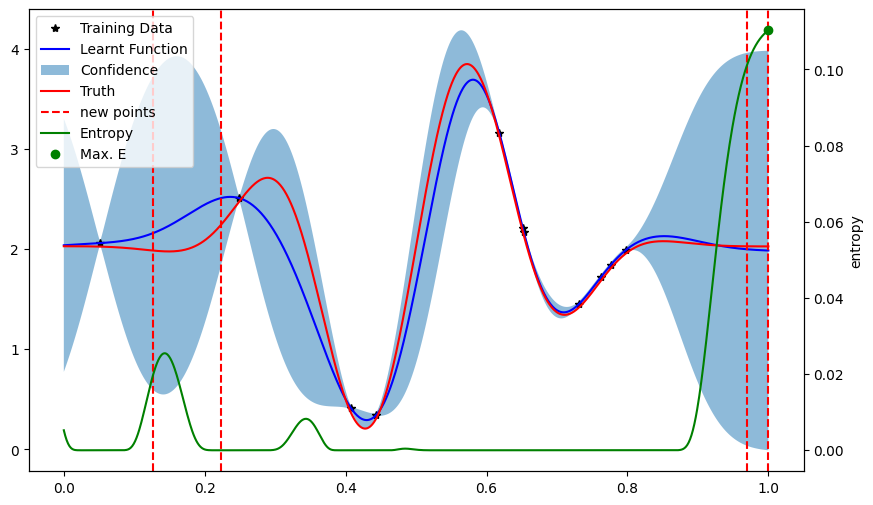

In [ ]:
plotGP(new_x=new_x)